# Model_Validation

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Model Capacity

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url =  'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [4]:
Elec.head(3)

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5


**산점도 시각화(surface_area vs electricity)**

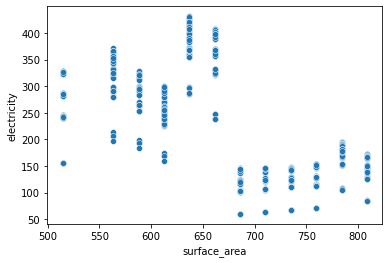

In [6]:
sns.scatterplot(x=Elec['surface_area'], y=Elec['electricity'])
plt.show()

**4개 모델 비교 시각화**

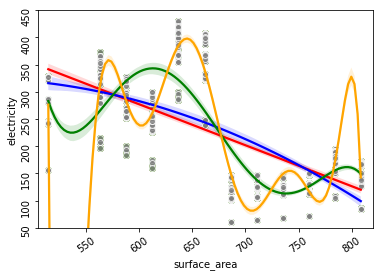

In [13]:
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'red'})
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'green'}, order = 5)
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'orange'}, order = 9,
            scatter_kws = {'color':'gray', 'edgecolor':'white'})
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

## Training Error

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url =  'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


### 1차모델 Training Error

In [16]:
X_train = Elec[['surface_area']]
y_train = Elec['electricity']

X_train.shape, y_train.shape

((768, 1), (768,))

- 모델생성

In [17]:
from sklearn.linear_model import LinearRegression

Model1 = LinearRegression()
Model1.fit(X_train,y_train)

LinearRegression()

In [18]:
print(Model1.coef_)
print(Model1.intercept_)

[-0.75387157]
729.4538243006992


In [20]:
# y_hat1 예측값 생성 
y_hat1 = Model1.predict(X_train)
len(y_hat1)

768

In [24]:
#MSE(Mean Squared Error) 계산
import numpy as np
MSE1 = np.mean((y_train-y_hat1)**2)
MSE1

5763.983779426347

### 5차 모델 Training Error

- X 다항 차수 변환
    - (768,1) to (768,5)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX5 = poly.fit_transform(X_train)
PX5

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [27]:
X_train.shape, PX5.shape

((768, 1), (768, 5))

- 5차 모델 생성

In [28]:
from sklearn.linear_model import LinearRegression

Model5 = LinearRegression()
Model5.fit(PX5,y_train)

LinearRegression()

In [29]:
np.set_printoptions(suppress=True, precision = 10)

print(Model5.coef_)
print(Model5.intercept_)

[-0.0003155139 -0.1029295461  0.0003787613 -0.0000005032  0.0000000002]
2906.2084288541437


- y_hat(예측값 )생성

In [32]:
PX5_pred = poly.fit_transform(X_train)
y_hat5 = Model5.predict(PX5_pred)
y_hat5.shape

(768,)

- MSE(Mean Squared Error)계산

In [34]:
MSE5 = np.mean((y_train-y_hat5)**2)
MSE5

4177.726328803677

### 9차 모델 Training Error

- X 다항차수 변환
    - (768,1) to (768,9)

In [35]:
from sklearn. preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias=False)
PX9 = poly.fit_transform(X_train)

In [36]:
X_train.shape, PX9.shape

((768, 1), (768, 9))

- 모델 생성

In [37]:
from sklearn.linear_model import LinearRegression

Model9 = LinearRegression()
Model9.fit(PX9,y_train)

LinearRegression()

In [38]:
print(Model9.coef_)
print(Model9.intercept_)

[ 0.  0.  0.  0.  0.  0. -0.  0. -0.]
-440.08258376361584


In [40]:
## y_hat(예측값 생성)
PX9_pred = poly.fit_transform(X_train)
y_hat9 = Model9.predict(PX9_pred)
y_hat9.shape

(768,)

In [42]:
## MSE 계산
MSE9 = np.mean((y_train-y_hat9)**2)
MSE9

4086.7199908144376

In [45]:
print('1차 모델 : ', MSE1)
print('5차 모델 : ', MSE5)
print('9차 모델 : ', MSE9)

1차 모델 :  5763.983779426347
5차 모델 :  4177.726328803677
9차 모델 :  4086.7199908144376


### 잔차(Residual) 시각화

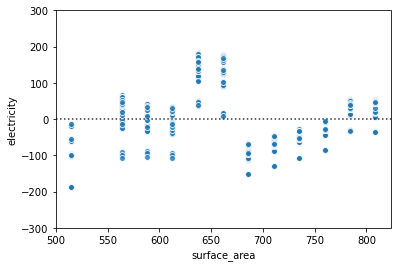

In [46]:
# 1차모델
sns.residplot(x = 'surface_area', 
              y = 'electricity', 
              data = Elec,
              order = 1, 
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()


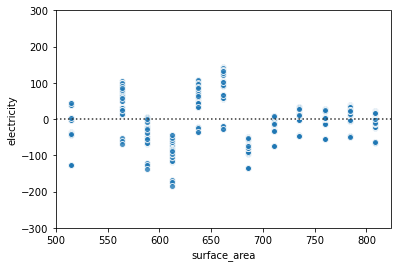

In [47]:
# 5차모델
sns.residplot(x = 'surface_area', 
              y = 'electricity', 
              data = Elec,
              order = 5,
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()


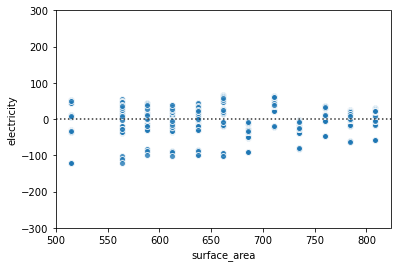

In [48]:
# 9차 모델
sns.residplot(x = 'surface_area', 
              y = 'electricity', 
              data = Elec,
              order = 9,
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()


## Testing Error

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.shape

(768, 9)